In [16]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import os
import glob

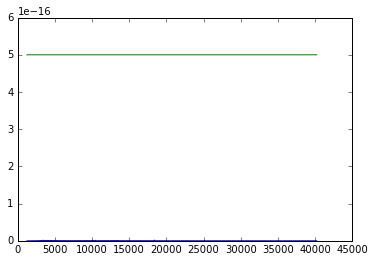

In [42]:
spectra = Table.read("../2017-02-10_euclid_run_individual_spectra_for_TIPS/clean_TIPSspec_ID_1000227.fits")
plt.plot(spectra["wave"], spectra["flux"])
spectra["flux"] = 5e-16*np.ones(len(spectra["flux"]))
plt.plot(spectra["wave"], spectra["flux"])
try:
    spectra.write("flat_spectrum_5-16.fits")
except IOError:
    os.system("rm flat_spectrum.fits")
    print("Removed older copy of flat_spectrum.fits")
    spectra.write("flat_spectrum.fits")

Mean levels of signal/noise: -3.91517064545e-23, 1.46787686472e-20, 5e-19, 

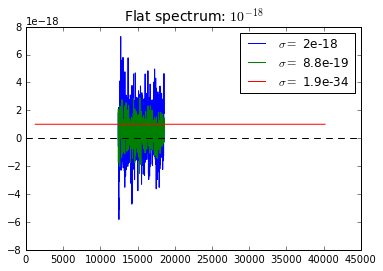

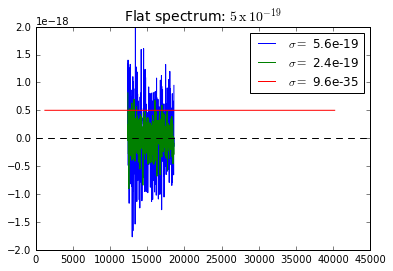

In [73]:
flist = glob.glob("flat_spectrum_1-18*")
plt.figure()
plt.title("Flat spectrum: $10^{-18}$", fontsize=14)
for fname in flist[::-1]:
    spec = Table.read(fname)
    sigma = np.std(spec["flux"])
    plt.plot(spec["wave"], spec["flux"], label=("$\sigma =$ %.2g" % sigma))
    plt.axhline(c="k", ls="--")
    plt.ylim(-8e-18, 8e-18)
    plt.legend()
    
flist = glob.glob("flat_spectrum_5-19*")
plt.figure()
plt.title("Flat spectrum: $5\,\mathrm{x}\,10^{-19}$", fontsize=14)
print("Mean levels of signal/noise: ", end="")
for fname in flist[::-1]:
    spec = Table.read(fname)
    sigma = np.std(spec["flux"])
    print(np.mean(spec["flux"]), end=", ")
    plt.plot(spec["wave"], spec["flux"], label=("$\sigma =$ %.2g" % sigma))
    plt.axhline(c="k", ls="--")
    plt.ylim(-2e-18, 2e-18)
    plt.legend()

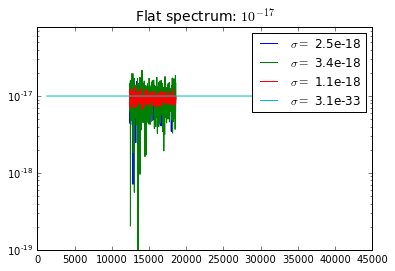

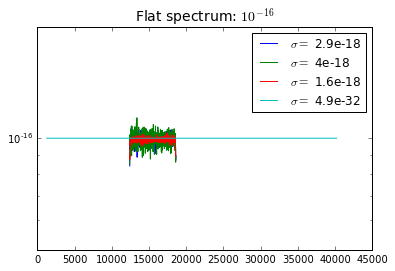

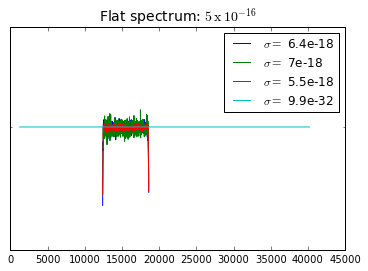

In [64]:
flist = glob.glob("flat_spectrum_1-17*")
plt.figure()
plt.title("Flat spectrum: $10^{-17}$", fontsize=14)
for fname in flist[::-1]:
    spec = Table.read(fname)
    sigma = np.std(spec["flux"])
    plt.plot(spec["wave"], spec["flux"], label=("$\sigma =$ %.2g" % sigma))
    plt.axhline(c="k", ls="--")
    plt.ylim(1e-19, 8e-17)
    plt.yscale("log")
    plt.legend()
    
flist = glob.glob("flat_spectrum_1-16*")
plt.figure()
plt.title("Flat spectrum: $10^{-16}$", fontsize=14)
for fname in flist[::-1]:
    spec = Table.read(fname)
    sigma = np.std(spec["flux"])
    plt.plot(spec["wave"], spec["flux"], label=("$\sigma =$ %.2g" % sigma))
    plt.axhline(c="k", ls="--")
    plt.ylim(5e-17, 2e-16)
    plt.yscale("log")
    plt.legend()

    
flist = glob.glob("flat_spectrum_5-16*")
plt.figure()
plt.title("Flat spectrum: $5\,\mathrm{x}\,10^{-16}$", fontsize=14)
for fname in flist[::-1]:
    spec = Table.read(fname)
    sigma = np.std(spec["flux"])
    plt.plot(spec["wave"], spec["flux"], label=("$\sigma =$ %.2g" % sigma))
    plt.axhline(c="k", ls="--")
    plt.ylim(4e-16, 6e-16)
    plt.yscale("log")
    plt.legend()

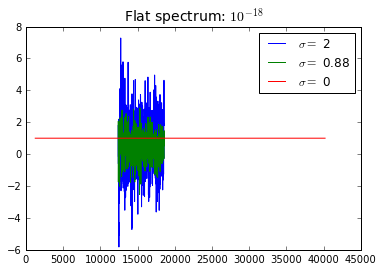

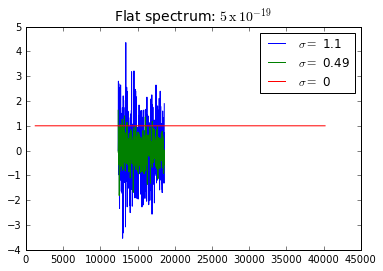

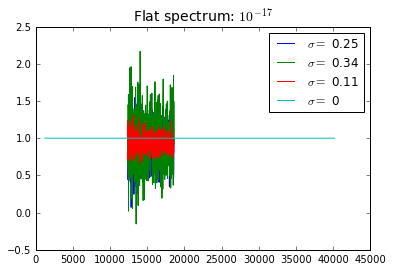

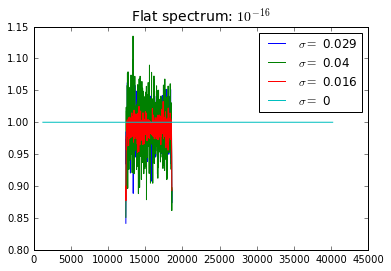

In [68]:
flist = glob.glob("flat_spectrum_1-18*")
plt.figure()
plt.title("Flat spectrum: $10^{-18}$", fontsize=14)
for fname in flist[::-1]:
    spec = Table.read(fname)
    sigma = np.std(spec["flux"]/1e-18)
    plt.plot(spec["wave"], spec["flux"]/1e-18, label=("$\sigma =$ %.2g" % sigma))
    plt.legend()
    
flist = glob.glob("flat_spectrum_5-19*")
plt.figure()
plt.title("Flat spectrum: $5\,\mathrm{x}\,10^{-19}$", fontsize=14)
for fname in flist[::-1]:
    spec = Table.read(fname)
    sigma = np.std(spec["flux"]/5e-19)
    plt.plot(spec["wave"], spec["flux"]/5e-19, label=("$\sigma =$ %.2g" % sigma))
    plt.legend()
    
flist = glob.glob("flat_spectrum_1-17*")
plt.figure()
plt.title("Flat spectrum: $10^{-17}$", fontsize=14)
for fname in flist[::-1]:
    spec = Table.read(fname)
    sigma = np.std(spec["flux"]/1e-17)
    plt.plot(spec["wave"], spec["flux"]/1e-17, label=("$\sigma =$ %.2g" % sigma))
    plt.legend()
    
flist = glob.glob("flat_spectrum_1-16*")
plt.figure()
plt.title("Flat spectrum: $10^{-16}$", fontsize=14)
for fname in flist[::-1]:
    spec = Table.read(fname)
    sigma = np.std(spec["flux"]/1e-16)
    plt.plot(spec["wave"], spec["flux"]/1e-16, label=("$\sigma =$ %.2g" % sigma))
    plt.legend()

# Photometry: Get IDS and relevant info

In [74]:
%%time
photometry = Table.read("2016-06-22_cosmossnap_photometry.out", format="ascii")

CPU times: user 3min 7s, sys: 25.1 s, total: 3min 32s
Wall time: 3min 42s


In [78]:
photometry = photometry.to_pandas()

In [ ]:
df[df['A'].isin([3, 6])]
photometry[photometry["Id"].isin()]

In [80]:
widespecs = Table.read("2017-02-13_euclid_sims_postprocessing/2017-02-13_euclid_wide_spectra_merged.csv")

In [81]:
idsref = widespecs.colnames

In [97]:
idsref = np.array(idsref[1:]).astype("int")

In [94]:
np.array(photometry["Id"]).dtype

dtype('int64')

In [99]:
outphot = photometry[photometry["Id"].isin(idsref)]

In [106]:
outphot.to_csv("2017-02-13_photometry_euclid_realistic_noise_run.csv", index=False)

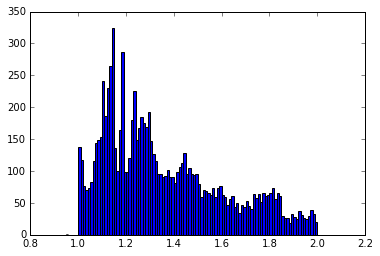

In [109]:
_ = plt.hist(outphot["z"], bins=np.arange(0.95, 2.05, 0.01))

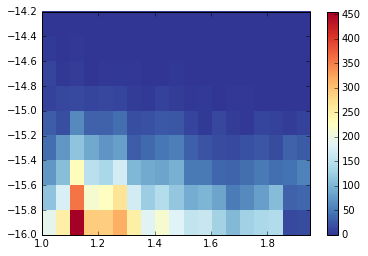

In [121]:
_ = plt.hist2d(outphot["z"], np.log10(outphot['Flux_Ha']), bins=[np.arange(1, 2, 0.05), np.arange(-16, -14.0, 0.2)], cmap=plt.cm.RdYlBu_r)
plt.colorbar()